In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew  

db = pd.read_csv('../data/users.dataset.csv')
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [2]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

<Axes: ylabel='count'>

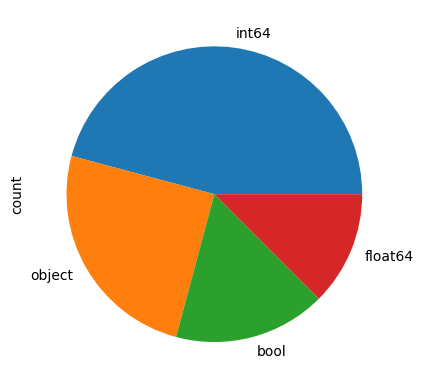

In [5]:
db.dtypes.value_counts().plot.pie()

In [10]:
print(db.isna().sum())

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64


<Axes: >

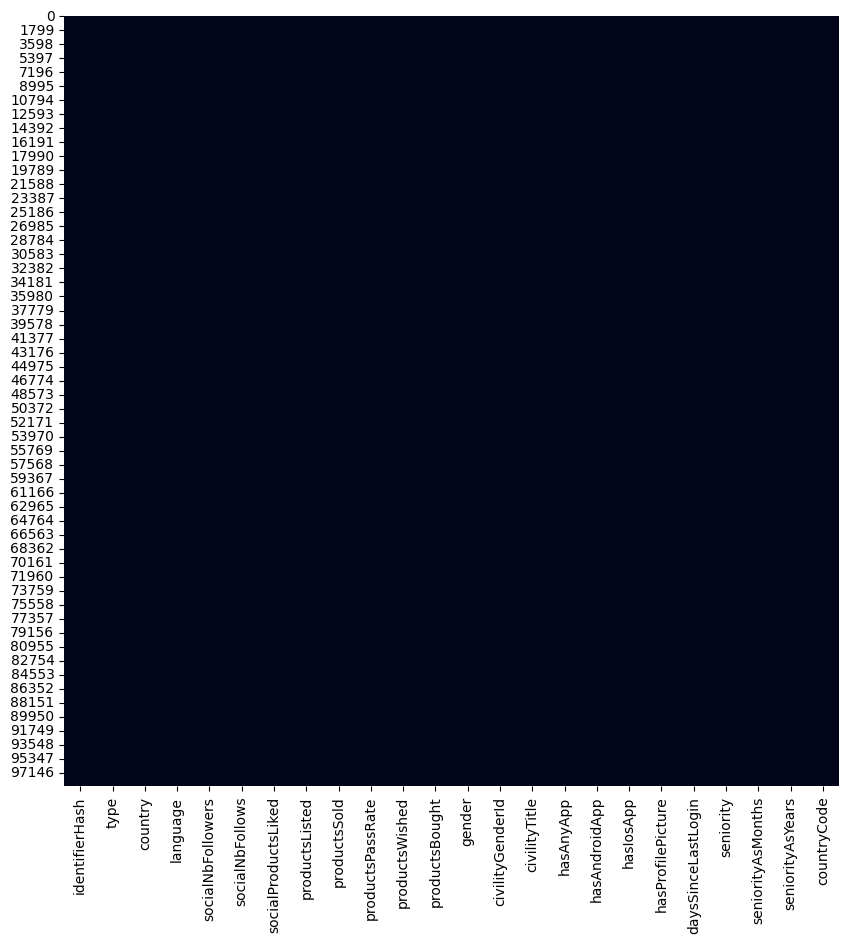

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(db.isna() , cbar=False) 

### skewness

In [14]:
db.select_dtypes(include='number').skew()
# Si Skewness nulle : La distribution est symétrique, avec une répartition équilibrée des données autour de la moyenne.

identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: float64

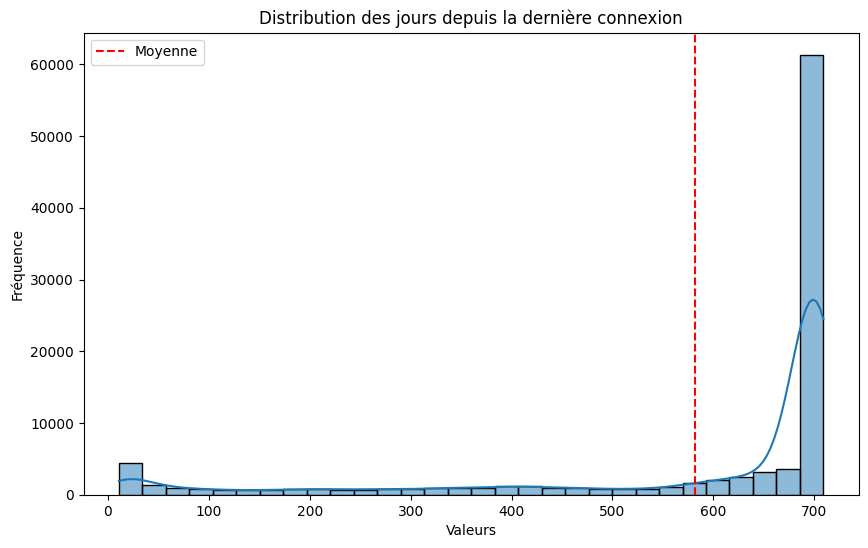

In [29]:
# Visualiser la distribution  
plt.figure(figsize=(10, 6))  
sns.histplot(db['daysSinceLastLogin'], bins=30, kde=True)  
plt.axvline(x=np.mean(db['daysSinceLastLogin']), color='red', linestyle='--', label='Moyenne')  
plt.title('Distribution des jours depuis la dernière connexion')  
plt.xlabel('Valeurs')  
plt.ylabel('Fréquence')  
plt.legend()  
plt.show()  

Text(0.5, 1.0, 'hasAnyApp Bins')

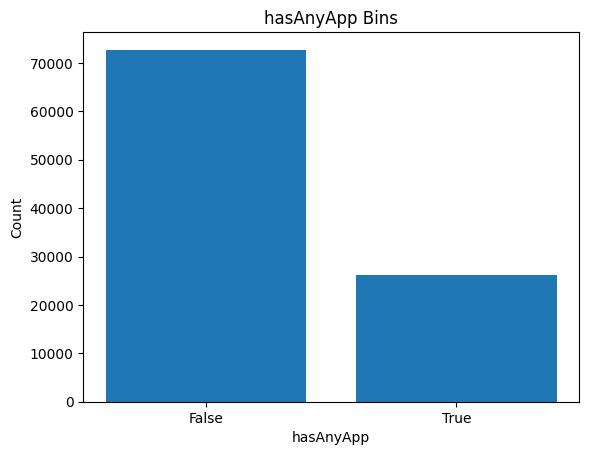

In [ ]:
group_names=['False','True']
q=plt.bar(group_names, db['hasAnyApp'].value_counts())

# user has ever used any of the store's official app
plt.xlabel("hasAnyApp")
plt.ylabel("Count")
plt.title("hasAnyApp Bins")

> Most of the users did not use the mobile app

In [34]:
df_group_two = db[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two

C:\Users\User\AppData\Local\Temp\ipykernel_24028\3675444363.py:2: FutureWarning: The provided callable <function sum at 0x000001F6537EF4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_24028\3675444363.py:2: FutureWarning: The provided callable <function mean at 0x000001F653804900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])


hasAnyApp productsBought           productsSold          
                       sum      mean          sum      mean
0     False           7957  0.109391         3233  0.044447
1      True           9049  0.345725         8794  0.335982

> Les utilisateurs ayant une application achètent et vendent significativement plus de produits par rapport à ceux qui n'en ont pas.

Text(0.5, 1.0, 'civilityTitle Bins')

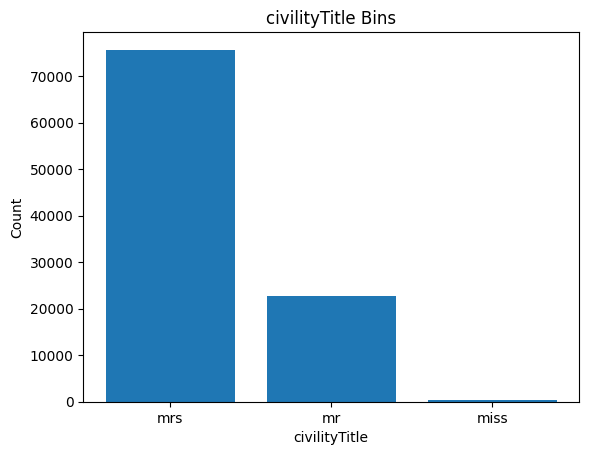

In [35]:
group_names=['mrs','mr','miss']
plt.bar(group_names, height=db['civilityTitle'].value_counts())

# set x/y labels and plot title
plt.xlabel("civilityTitle")
plt.ylabel("Count")
plt.title("civilityTitle Bins")

> Married women seem to be the most active users on this site

In [36]:
df_group_one = db[['civilityTitle','productsBought','productsSold']]
df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
df_group_one

C:\Users\User\AppData\Local\Temp\ipykernel_24028\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x000001F6537EF4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_24028\3517141676.py:2: FutureWarning: The provided callable <function mean at 0x000001F653804900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_24028\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x000001F6537EF4C0> is currently using SeriesGroupBy.sum. In a future

civilityTitle productsBought           productsSold          
                           sum      mean          sum      mean
0          miss            287  0.656751          574  1.313501
1            mr           4262  0.186995         2673  0.117278
2           mrs          12457  0.164592         8780  0.116009

> Les hommes (mr) et les dames mariées (mrs) semblent plus actifs dans les achats en termes de quantités totales. Toutefois, les mademoiselles montrent une moyenne d'achats et de ventes plus élevée par utilisateur.

Text(0.5, 1.0, 'language Bins')

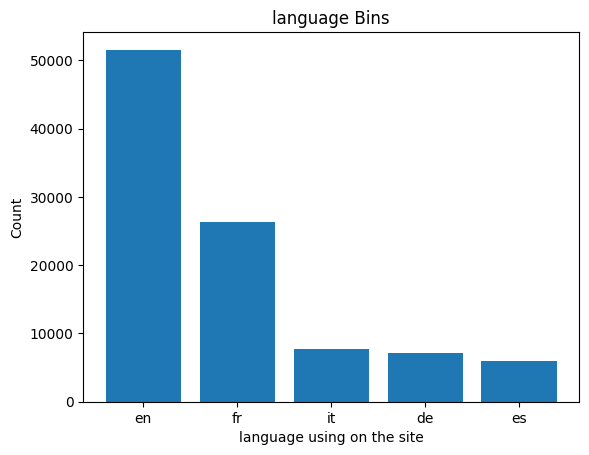

In [38]:
group_names=['en', 'fr', 'it', 'de', 'es']
q=plt.bar(group_names, db['language'].value_counts())

# set x/y labels and plot title
plt.xlabel("language using on the site")
plt.ylabel("Count")
plt.title("language Bins")

In [39]:
df_group_three = db[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

C:\Users\User\AppData\Local\Temp\ipykernel_24028\95561689.py:2: FutureWarning: The provided callable <function sum at 0x000001F6537EF4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_24028\95561689.py:2: FutureWarning: The provided callable <function mean at 0x000001F653804900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_24028\95561689.py:2: FutureWarning: The provided callable <function sum at 0x000001F6537EF4C0> is currently using SeriesGroupBy.sum. In a future version

language productsBought           productsSold          
                      sum      mean          sum      mean
0       de           1705  0.237531          539  0.075091
1       en           8918  0.172950         4877  0.094581
2       es            797  0.132107          901  0.149345
3       fr           4386  0.166313         3004  0.113909
4       it           1200  0.154520         2706  0.348442

> Users' first prefer language is English, and the second one is French However, they did not have the highest average productsBought and productsSold.

<Axes: xlabel='language', ylabel='count'>

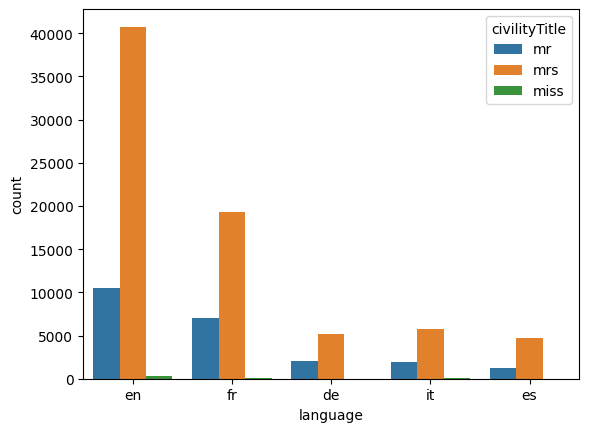

In [40]:
sns.countplot(x='language',data=db,hue='civilityTitle') 

> countplot tells us that there are more married females users globally.

### Remove variables

In [41]:
repeat_columns = []
# unused and repeated metadata are dropped
repeat_columns += ['identifierHash', 'type','country','gender','civilityTitle']
db1=db.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


### Encode variables

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = db[[var]] #use double brakets to make sure i'm taking a dataframe 
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True)

db2 = db1.drop(string_columns, axis = 1)
db2.head()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   socialNbFollowers            98913 non-null  int64  
 1   socialNbFollows              98913 non-null  int64  
 2   socialProductsLiked          98913 non-null  int64  
 3   productsListed               98913 non-null  int64  
 4   productsSold                 98913 non-null  int64  
 5   productsPassRate             98913 non-null  float64
 6   productsWished               98913 non-null  int64  
 7   productsBought               98913 non-null  int64  
 8   civilityGenderId             98913 non-null  int64  
 9   daysSinceLastLogin           98913 non-null  int64  
 10  seniority                    98913 non-null  int64  
 11  seniorityAsMonths            98913 non-null  float64
 12  seniorityAsYears             98913 non-null  float64
 13  language_encoded

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

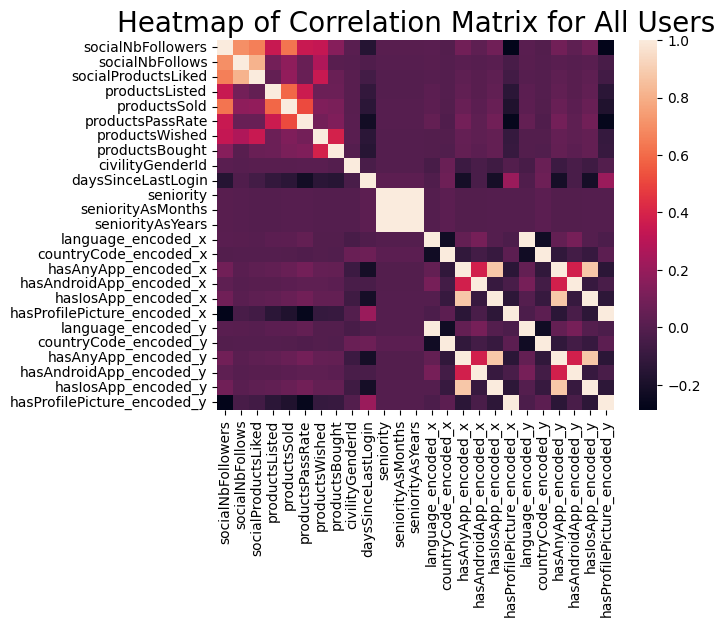

In [49]:
# plt.figure(figsize=(11,11))
a=sns.heatmap(db2.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

variable daysSinceLastLogin & hasProfilePicture: seem to be negatively correlated to every other variable. However, only 1.95% users did not have profile picture.

variable socialNbFollowers &socialNBFollows & socialproductsLiked & productsListed & productsSold & productsPassRate & productsWished seem to positively related to each other.

variable seniority seem to be uncorrelated with every other variable.

variable language and country seem to be negatively correlated, have week correlation with variable hasAnyApp & hasIosApp & hasAndroidApp; but have almost no correation with other variables. For now, we could keep these variables for further analysis.

In [50]:
#remove variables with no correlations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']

db3 = db2.drop(no_columns, axis = 1)

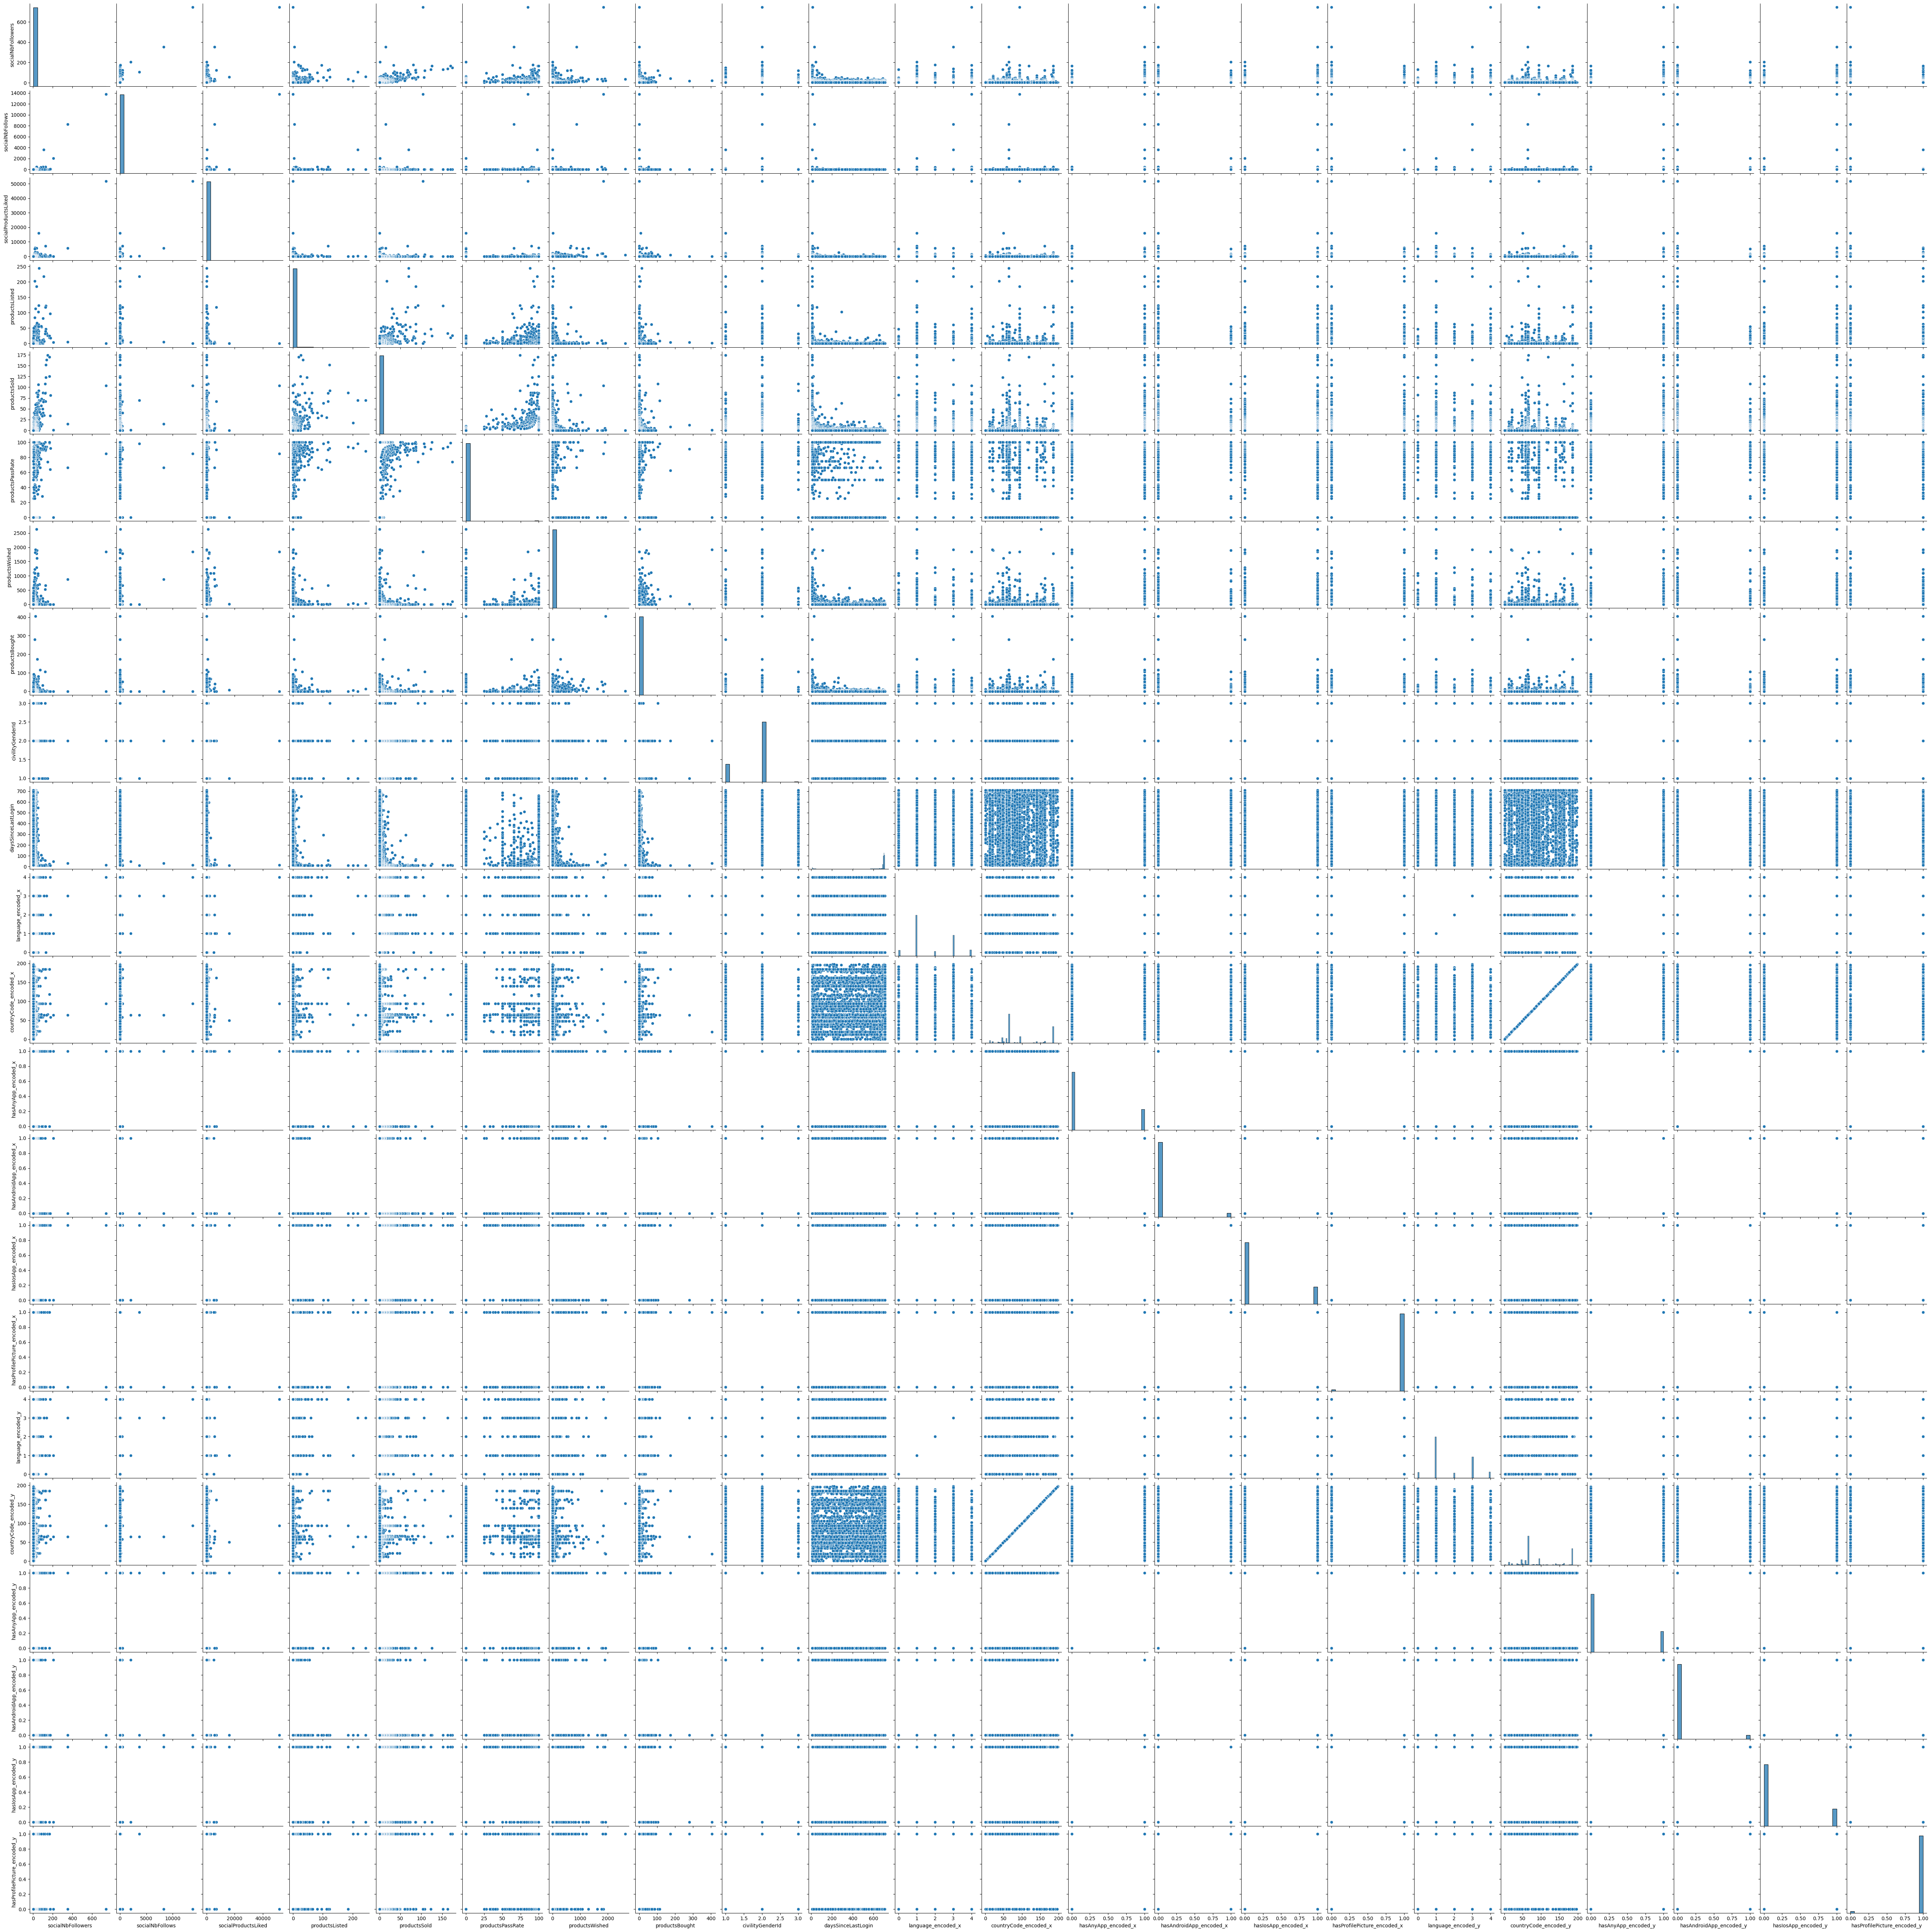

In [51]:
sns.pairplot(db3) # Parplot helps to get one to one relation between all attributes in dataset

### 4. Sample choosing for dendogram :
   
Since this dataset is too large for drawing dendrogram, we could choose 30% of the data randomly.

In [54]:
print("Original dataset before filtering", db.shape)
print("Remainging data after filtering variables with no correlations:\n",db3.shape)
db_final = db3.sample(frac = 0.3)
print("\n Final shrinking columns: \n",db_final.columns)
print("\n Final shrinking data: \n",db_final.shape)


Original dataset before filtering (98913, 24)
Remainging data after filtering variables with no correlations:
 (98913, 22)

 Final shrinking columns: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded_x', 'countryCode_encoded_x', 'hasAnyApp_encoded_x',
       'hasAndroidApp_encoded_x', 'hasIosApp_encoded_x',
       'hasProfilePicture_encoded_x', 'language_encoded_y',
       'countryCode_encoded_y', 'hasAnyApp_encoded_y',
       'hasAndroidApp_encoded_y', 'hasIosApp_encoded_y',
       'hasProfilePicture_encoded_y'],
      dtype='object')

 Final shrinking data: 
 (29674, 22)


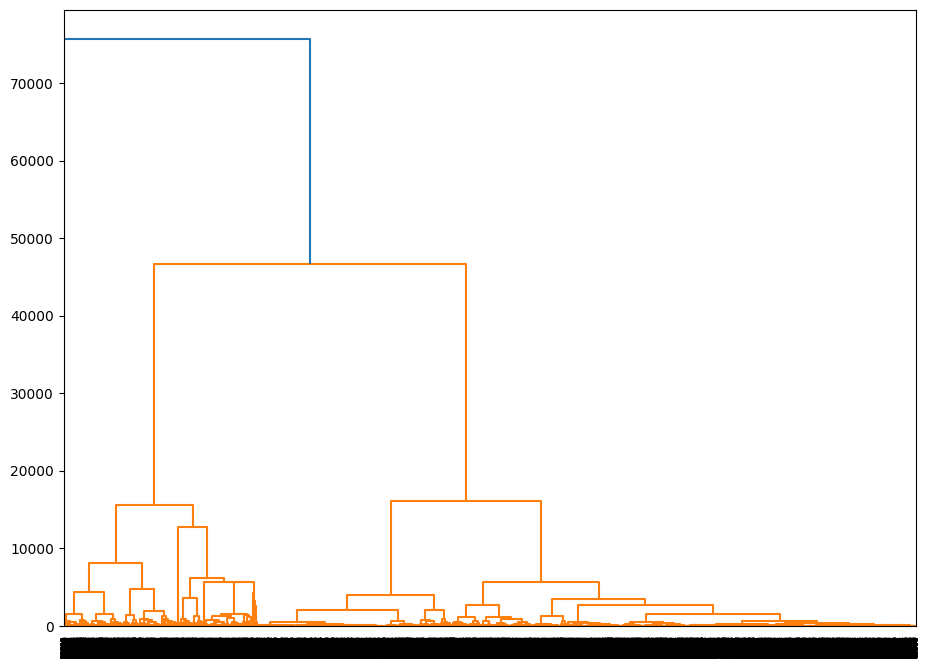

In [55]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize = (11, 8))
dendogram = sch.dendrogram(sch.linkage(db_final,method = 'ward'))

According to the dendrogram plot, the numbers of recommended clusters would be two. We could then segment users into two main clusters(Active/Inactive). However, it also seems that we group the data into smaller clusters.

In [57]:
db3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   socialNbFollowers            98913 non-null  int64  
 1   socialNbFollows              98913 non-null  int64  
 2   socialProductsLiked          98913 non-null  int64  
 3   productsListed               98913 non-null  int64  
 4   productsSold                 98913 non-null  int64  
 5   productsPassRate             98913 non-null  float64
 6   productsWished               98913 non-null  int64  
 7   productsBought               98913 non-null  int64  
 8   civilityGenderId             98913 non-null  int64  
 9   daysSinceLastLogin           98913 non-null  int64  
 10  language_encoded_x           98913 non-null  float64
 11  countryCode_encoded_x        98913 non-null  float64
 12  hasAnyApp_encoded_x          98913 non-null  float64
 13  hasAndroidApp_en